In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

In [2]:
data = pd.read_csv('data', sep = '\t')

In [3]:
data

,sigma,lambda
0,0.000,1.000
1,0.023,1.005
2,0.054,1.010
3,0.099,1.016
4,0.130,1.021
5,0.197,1.027
6,0.271,1.032
7,0.346,1.038
8,0.427,1.043
9,0.538,1.048


In [4]:
def func(lamb, Jm = 0.19208908, mu = 0.83608739):
    return mu * (lamb ** 2 - 1 / lamb) / (Jm + 3 - 2 / lamb - lamb ** 2)

In [5]:
popt, pcov = curve_fit(func, data['lambda'].values, data['sigma'].values)

In [6]:
popt

array([0.19208908, 0.83608739])

In [7]:
mod_sigma = func(data['lambda'].values)
VU_sigma = func(data['lambda'].values, 0.4, 2)

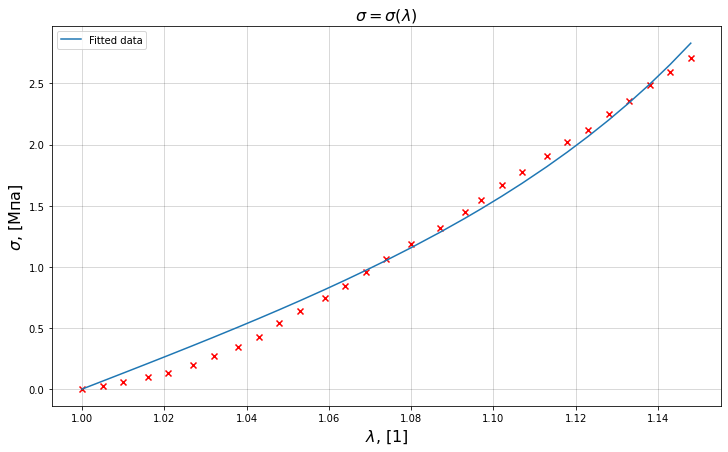

In [8]:
fig, ax = plt.subplots()

fig.set_figheight(7)
fig.set_figwidth(12)
ax.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
ax.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')
plt.title('$\sigma=\sigma (\lambda)$', fontsize = 16)

plt.xlabel('$\lambda$, [1]', fontsize = 16)
plt.ylabel('$\sigma$, [Мпа]', fontsize = 16)

#ax.plot(data['lambda'],data['sigma'], label = 'Experimental')
ax.scatter(data['lambda'],data['sigma'], marker = 'x', color = 'r')
ax.plot(data['lambda'], mod_sigma, label = 'Fitted data')
#ax.plot(data['lambda'], VU_sigma, label = 'VU')

ax.legend(loc = 'best')
plt.show()

$\frac {\partial W}{\partial \alpha}(\alpha) = \frac {2\mu J_m ({-\alpha}^{-5} + \alpha)}{J_m - {\alpha}^{-4} - 2{\alpha}^2 + 3}$

$\mu = 0.83608739, \text{[МПа]}$

$J_m = 0.19208908$

In [9]:
mu = 0.83608739 * 1e6
Jm = 0.19208908

In [10]:
2 * mu * Jm

321206.5150894024

In [11]:
def dWda(a):
    mu = 0.83608739 * 1e6
    Jm = 0.19208908
    return 2 * mu * Jm * (-a ** (-5) + a) / (Jm - a ** (-4) - 2*a**2 + 3)

In [12]:
totaltime = 120 #days
sigmatm = 20000
p0 = 2.0 * 1e3
N = 100
h0 = 0.12 * 1e-3
gr = 1.0
beta = 0.2 #when totaltime in days

In [13]:
def calcp(t):
    return p0 * (1-np.exp(-beta*t/N*totaltime))

In [39]:
p

array([   0.        ,  426.74427787,  762.43321639, 1026.49548808,
       1234.21422805, 1397.61157618, 1526.14448264, 1627.25204792,
       1706.78607574, 1769.34975792, 1818.56409342, 1857.27746089,
       1887.73047433, 1911.68566316, 1930.52948211, 1945.35255511,
       1957.01279731, 1966.18506869, 1973.40023292, 1979.07588211,
       1983.5405059 , 1987.05250336, 1989.81513841, 1991.98830412,
       1993.6977768 , 1995.04249565, 1996.10028895, 1996.93237864,
       1997.58692357, 1998.10180685, 1998.50682838, 1998.8254296 ,
       1999.0760502 , 1999.27319535, 1999.42827521, 1999.55026535,
       1999.6462262 , 1999.72171167, 1999.78109065, 1999.8277998 ,
       1999.86454253, 1999.89344538, 1999.91618117, 1999.93406577,
       1999.9481343 , 1999.95920099, 1999.96790636, 1999.97475425,
       1999.98014099, 1999.98437835, 1999.98771158, 1999.99033358,
       1999.99239613, 1999.99401858, 1999.99529485, 1999.9962988 ,
       1999.99708853, 1999.99770976, 1999.99819843, 1999.99858

In [47]:
alpha = np.zeros((N, 2)).astype(np.double)
h = np.zeros((N, 2)).astype(np.double)
gt = np.zeros((N, 2)).astype(np.double)
a = np.zeros(N).astype(np.double)
sigma = np.zeros((N, 2)).astype(np.double)
dt = totaltime / N
p = calcp(np.arange(N)).astype(np.double)

alpha[0][0] = 1.0
alpha[0][1] = 1.0
gt[0][0] = 1.0
gt[0][1] = 1.0

bt = 1e-5
a[0] = 6.71 / 2 * 1e-3

sigma[0][0] = p[0] * a[0] / 2 / h0 * alpha[0][0] ** 2
sigma[0][1] = p[0] * a[0] / 2 / h0 * alpha[0][0] ** 2

In [48]:
def f1(a,t):
    I = 3*(a[0] ** 2 * gt[t][0]**2 + (a[0] + h0)**2 * gt[t][1]**2 * h0) / 2
    print(I)
    return (gr * dWda(a / (a[0] * gt[t][0])) / gt[t][0] / a[0] / (a / (a[0] * gt[t][0])) ** 2 + gr * dWda((a ** 3 + I) ** (1/3) / (a[0]+ h0) / gt[t][1]) / gt[t][1] / (a[0]+ h0) / ((a ** 3 + I) ** (1/3) / (a[0] + h0) / gt[t][1]) ** 2) * h0 / 2 - p[t]

In [49]:
def f(a, t):
    s1 = dWda(alpha[t][0]) / (gt[t][0] * a[0] * alpha[t][0] ** 2)
    s2 = dWda(alpha[t][1]) / (gt[t][0] * (a[0] + h0) * alpha[t][1] ** 2)
    #print(s1)
    return  0.5 * gr * h0 * (s1+s2) - p[t]

In [50]:
for t in range(1,N):
    gt[t][0] = gt[t-1][0] + dt * bt * (sigma[t-1][0] - sigmatm * p[t-1] / p0)
    gt[t][1] = gt[t-1][1] + dt * bt * (sigma[t-1][1] - sigmatm * p[t-1] / p0)
    #ret = fsolve(f, [a[0]],t)
    a[t] = fsolve(f, [a[0]],t)
    alpha[t][0] = a[t] / (a[0] * gt[t][0])
    I1 = 3 * (a[0] ** 2 * gt[t][0]**2 + (a[0] + h0)**2 * gt[t][1]**2) * h0 / 2
    alpha[t][1] = (a[t] ** 3 + I1) ** (1/3) / (a[0] + h0) / gt[t][1]
    sigma[t][0] = p[t] * a[t] * alpha[t][0]**2 / 2 / h0
    sigma[t][1] = p[t] * a[t] * alpha[t][1]**2 / 2 / h0

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [55]:
a

array([0.003355, 0.003355, 0.003355, 0.003355, 0.003355, 0.003355,
       0.003355, 0.003355, 0.003355, 0.003355, 0.003355, 0.003355,
       0.003355, 0.003355, 0.003355, 0.003355, 0.003355, 0.003355,
       0.003355, 0.003355, 0.003355, 0.003355, 0.003355, 0.003355,
       0.003355, 0.003355, 0.003355, 0.003355, 0.003355, 0.003355,
       0.003355, 0.003355, 0.003355, 0.003355, 0.003355, 0.003355,
       0.003355, 0.003355, 0.003355, 0.003355, 0.003355, 0.003355,
       0.003355, 0.003355, 0.003355, 0.003355, 0.003355, 0.003355,
       0.003355, 0.003355, 0.003355, 0.003355, 0.003355, 0.003355,
       0.003355, 0.003355, 0.003355, 0.003355, 0.003355, 0.003355,
       0.003355, 0.003355, 0.003355, 0.003355, 0.003355, 0.003355,
       0.003355, 0.003355, 0.003355, 0.003355, 0.003355, 0.003355,
       0.003355, 0.003355, 0.003355, 0.003355, 0.003355, 0.003355,
       0.003355, 0.003355, 0.003355, 0.003355, 0.003355, 0.003355,
       0.003355, 0.003355, 0.003355, 0.003355, 0.003355, 0.003

In [52]:
alpha

array([[1.        , 1.        ],
       [1.        , 1.00000686],
       [0.98002989, 0.98137984],
       [0.95081803, 0.95388261],
       [0.92232213, 0.92659473],
       [0.89908807, 0.90382901],
       [0.88179998, 0.8864152 ],
       [0.86958543, 0.87371191],
       [0.86123868, 0.86471051],
       [0.85567224, 0.85846034],
       [0.85203151, 0.85418847],
       [0.8496888 , 0.85130691],
       [0.84820214, 0.84938516],
       [0.84726985, 0.84811618],
       [0.84669104, 0.84728549],
       [0.84633471, 0.84674577],
       [0.84611686, 0.84639738],
       [0.84598444, 0.84617373],
       [0.84590432, 0.84603083],
       [0.84585603, 0.84593989],
       [0.845827  , 0.84588221],
       [0.8458096 , 0.84584572],
       [0.84579919, 0.8458227 ],
       [0.84579297, 0.8458082 ],
       [0.84578926, 0.84579909],
       [0.84578705, 0.84579337],
       [0.84578573, 0.84578978],
       [0.84578494, 0.84578754],
       [0.84578448, 0.84578613],
       [0.8457842 , 0.84578525],
       [0.

In [53]:
gt

array([[1.        , 1.        ],
       [1.        , 1.        ],
       [1.02037704, 1.02037802],
       [1.05172595, 1.05206558],
       [1.08421989, 1.08556464],
       [1.1122381 , 1.11521839],
       [1.13404403, 1.13902828],
       [1.14997327, 1.15704675],
       [1.16111831, 1.17015546],
       [1.16867178, 1.17942459],
       [1.17366551, 1.18583682],
       [1.17690147, 1.19019549],
       [1.17896425, 1.19311579],
       [1.18026152, 1.19504902],
       [1.18106836, 1.19631599],
       [1.18156562, 1.19713936],
       [1.18186984, 1.19767069],
       [1.18205484, 1.19801156],
       [1.1821668 , 1.19822916],
       [1.18223429, 1.19836752],
       [1.18227486, 1.19845519],
       [1.18229918, 1.19851058],
       [1.18231373, 1.1985455 ],
       [1.18232243, 1.19856747],
       [1.18232762, 1.19858127],
       [1.18233071, 1.19858993],
       [1.18233255, 1.19859535],
       [1.18233365, 1.19859874],
       [1.1823343 , 1.19860086],
       [1.18233469, 1.19860219],
       [1.

In [54]:
def ftest(x,t):
    #print('a')
    return x ** 2 - t

In [ ]:
fsolve(ftest, [1], 121)

In [ ]:
for t in range(5):
    print(fsolve(ftest, [1], t))

In [57]:
q = alpha[:,0] * gt[:,0]
q

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [58]:
q = np.zeros(N)
for t in range(N):
    q[t] = alpha[t][1] * gt[t][1]

In [30]:
q

array([1.        , 1.00000686, 1.00002046, 1.00004473, 1.00007733,
       1.00011641, 1.00016052, 1.0002085 , 1.00025943, 1.00031262,
       1.00036749, 1.0004236 , 1.00048062, 1.00053828, 1.00059636,
       1.00065471, 1.00071319, 1.0007717 , 1.00083017, 1.00088853,
       1.00094675, 1.00100478, 1.0010626 , 1.00112018, 1.00117751,
       1.00123459, 1.00129139, 1.00134791, 1.00140415, 1.00146011,
       1.00151578, 1.00157116, 1.00162625, 1.00168105, 1.00173557,
       1.0017898 , 1.00184374, 1.0018974 , 1.00195077, 1.00200387,
       1.00205668, 1.00210921, 1.00216147, 1.00221345, 1.00226516,
       1.0023166 , 1.00236776, 1.00241866, 1.0024693 , 1.00251967,
       1.00256977, 1.00261962, 1.00266921, 1.00271854, 1.00276761,
       1.00281643, 1.002865  , 1.00291331, 1.00296138, 1.0030092 ,
       1.00305678, 1.00310411, 1.0031512 , 1.00319805, 1.00324466,
       1.00329103, 1.00333717, 1.00338307, 1.00342874, 1.00347417,
       1.00351938, 1.00356436, 1.00360911, 1.00365363, 1.00369